In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/Users/alex/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading and preparing the data 

In [15]:
df = pd.read_csv("stocks_combined_scaled.csv", index_col=0)
#df['daily_volatility'] = df['price'] - df['open']
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention
0,2014-01-02,10107,MSFT,-0.999221,1.117934,-0.419196,-0.992613,-1.004799,-0.997672,-0.998750,0.138220,-0.419196,-0.712226
1,2014-01-03,10107,MSFT,-1.001527,1.148820,-0.421781,-0.994243,-1.009502,-0.999057,-1.001888,0.132557,-0.421781,-0.816796
2,2014-01-06,10107,MSFT,-1.008721,1.870624,-1.249333,-0.997232,-1.014112,-1.002286,-1.005672,0.114890,-1.249333,-0.771331
3,2014-01-07,10107,MSFT,-1.006139,1.417816,0.409965,-1.000854,-1.013171,-1.007130,-1.007056,0.121232,0.409965,-0.839528
4,2014-01-08,10107,MSFT,-1.012134,2.840056,-1.060843,-1.004023,-1.019098,-1.010129,-1.011579,0.106510,-1.060843,-0.807703


In [20]:
df['stock_dummy'] = df['ticker'].astype('category').cat.codes
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,stock_dummy
0,2014-01-02,10107,MSFT,-0.999221,1.117934,-0.419196,-0.992613,-1.004799,-0.997672,-0.998750,0.138220,-0.419196,-0.712226,20
1,2014-01-03,10107,MSFT,-1.001527,1.148820,-0.421781,-0.994243,-1.009502,-0.999057,-1.001888,0.132557,-0.421781,-0.816796,20
2,2014-01-06,10107,MSFT,-1.008721,1.870624,-1.249333,-0.997232,-1.014112,-1.002286,-1.005672,0.114890,-1.249333,-0.771331,20
3,2014-01-07,10107,MSFT,-1.006139,1.417816,0.409965,-1.000854,-1.013171,-1.007130,-1.007056,0.121232,0.409965,-0.839528,20
4,2014-01-08,10107,MSFT,-1.012134,2.840056,-1.060843,-1.004023,-1.019098,-1.010129,-1.011579,0.106510,-1.060843,-0.807703,20


In [21]:
print(df.dtypes)

date                     object
permno                    int64
ticker                   object
price                   float64
volume                  float64
return                  float64
high                    float64
low                     float64
open                    float64
avg_price               float64
mkt_cap                 float64
pct_return              float64
name_price_attention    float64
stock_dummy                int8
dtype: object


In [27]:
from statsmodels.formula.api import ols

fit = ols('Q("return") ~ C(stock_dummy) + name_price_attention', data=df).fit() 

fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.814
Date:                Tue, 05 Mar 2024   Prob (F-statistic):            0.00529
Time:                        11:53:23   Log-Likelihood:                -99936.
No. Observations:               70448   AIC:                         1.999e+05
Df Residuals:                   70419   BIC:                         2.002e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0177      0.020      0.883      0.377      -0.022       0.057
C(stock_dummy)[T.1]     -0.0211      0.028     -0.747      0.455      -0.076       0.034
C(stock_dummy)[T.2]     -0.0142      0.028     -0.497      0.619      -0.070       0.042
C(stock_dummy)[T.3]     -0.0108      0.028     -0.381      0.703      -0.067       0.045
C(stock_dummy)[T.4]     -0.0167      0.028     -0.594      0.553      -0.072       0.039
C(stock_dummy)[T.5]      0.0028      0.028      0.099      0.921      -0.053       0.059
C(stock_dummy)[T.6]     -0.0268      0.028     -0.949      0.343      -0.082       0.029
C(stock_dummy)[T.7]     -0.0337      0.028     -1.194      0.232      -0.089       0.022
C(stock_dummy)[T.8]     -0.0333      0.028     -1.174      0.240      -0.089       0.022
C(stock_dummy)[T.9]     -0.0137      0.028     -0.480      0.631      -0.069       0.042
C(stock_dummy)[T.10]    -0.0205      0.028     -0.727      0.467      -0.076       0.035
C(stock_dummy)[T.11]    -0.0202      0.028     -0.714      0.475      -0.076       0.035
C(stock_dummy)[T.12]    -0.0675      0.028     -2.374      0.018      -0.123      -0.012
C(stock_dummy)[T.13]    -0.0360      0.028     -1.274      0.203      -0.091       0.019
C(stock_dummy)[T.14]    -0.0217      0.029     -0.760      0.447      -0.078       0.034
C(stock_dummy)[T.15]    -0.0096      0.028     -0.339      0.735      -0.065       0.046
C(stock_dummy)[T.16]    -0.0229      0.029     -0.802      0.422      -0.079       0.033
C(stock_dummy)[T.17]    -0.0137      0.028     -0.482      0.630      -0.069       0.042
C(stock_dummy)[T.18]    -0.0399      0.028     -1.405      0.160      -0.096       0.016
C(stock_dummy)[T.19]    -0.0177      0.028     -0.625      0.532      -0.073       0.038
C(stock_dummy)[T.20]     0.0068      0.028      0.240      0.811      -0.049       0.062
C(stock_dummy)[T.21]    -0.0022      0.029     -0.077      0.939      -0.059       0.054
C(stock_dummy)[T.22]    -0.0247      0.028     -0.871      0.384      -0.080       0.031
C(stock_dummy)[T.23]    -0.0135      0.029     -0.474      0.636      -0.070       0.042
C(stock_dummy)[T.24]     0.0461      0.028      1.636      0.102      -0.009       0.101
C(stock_dummy)[T.25]     0.0209      0.029      0.723      0.470      -0.036       0.077
C(stock_dummy)[T.26]    -0.0606      0.028     -2.149      0.032      -0.116      -0.005
C(stock_dummy)[T.27]    -0.0319      0.028     -1.129      0.259      -0.087       0.023
name_price_attention     0.0209      0.004      4.777      0.000       0.012       0.029
==============================================================================
Omnibus:                    15704.034   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767936.50

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula
formula = 'Q("return") ~ C(stock_dummy) + name_price_attention'

# Fit the model using RLM for a robust regression
model = smf.rlm(formula, data=df, M=sm.robust.norms.HuberT())
results = model.fit()

# Print the summary
print(results.summary())

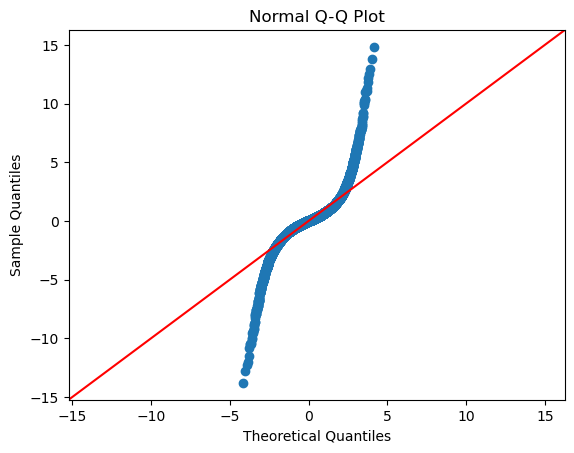

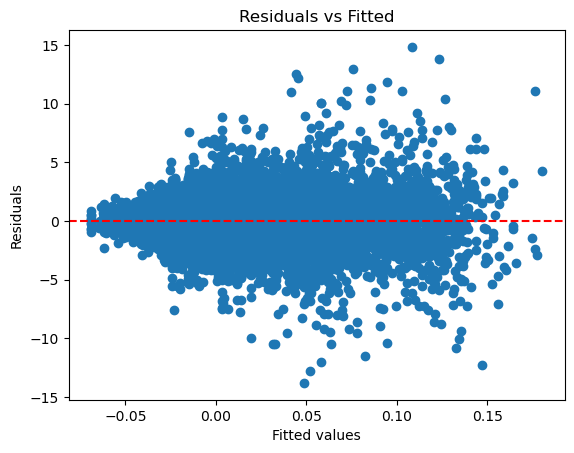

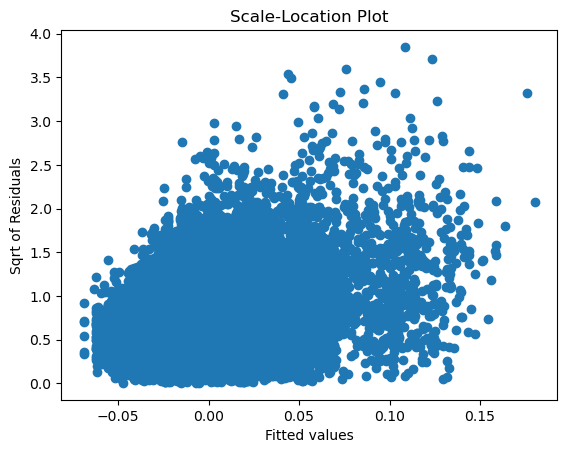

KeyboardInterrupt: 

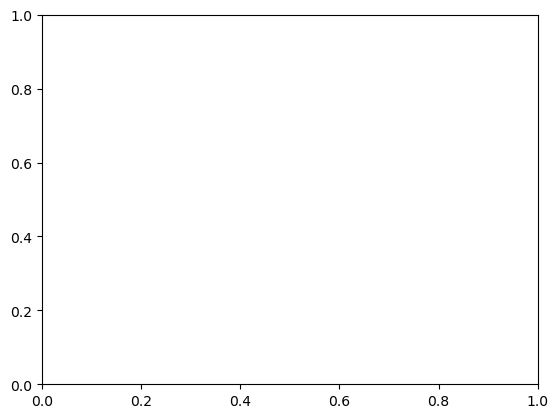

In [32]:
# QQ plot for normality of residuals
fig = sm.qqplot(fit.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(fit.fittedvalues, fit.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(fit.fittedvalues, fit.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
sm.graphics.influence_plot(fit, criterion="cooks")
plt.title('Influence Plot')
plt.show()

In [28]:
import statsmodels.api as sm

X = sm.add_constant(df[['stock_dummy', 'name_price_attention']])
y = df['return']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.408
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           8.21e-05
Time:                        11:56:12   Log-Likelihood:                -99952.
No. Observations:               70448   AIC:                         1.999e+05
Df Residuals:                   70445   BIC:                         1.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0025 

In [72]:
import pandas as pd
import statsmodels.api as sm

# Combine the independent variables and dummies
X = pd.concat([df[['name_price_attention']], df['stock_dummy']], axis=1)

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Define the dependent variable
y = df['return']

# Run the OLS regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.408
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           8.21e-05
Time:                        19:23:08   Log-Likelihood:                -99952.
No. Observations:               70448   AIC:                         1.999e+05
Df Residuals:                   70445   BIC:                         1.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0025 

In [67]:
import pandas as pd
import statsmodels.api as sm

# Assuming the dataframe 'df' is already created and contains your stock data

# Create dummy variables for the 'ticker' column, excluding the first to avoid multicollinearity
ticker_dummies = pd.get_dummies(df['ticker'], drop_first=True)

# Join the dummy variables with the main dataframe
df_with_dummies = df.join(ticker_dummies)

# OLS regression with 'return' as the dependent variable, 'name_price_attention' and the stock dummies as independent variables
X = sm.add_constant(df_with_dummies[['name_price_attention'] + list(ticker_dummies.columns)])
y = df_with_dummies['return']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# The summary of the regression
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [47]:
print(df.dtypes)

date                     object
permno                    int64
ticker                   object
price                   float64
volume                  float64
return                  float64
high                    float64
low                     float64
open                    float64
avg_price               float64
mkt_cap                 float64
pct_return              float64
name_price_attention    float64
dtype: object


In [4]:
df_test = pd.read_csv("quarterly_financial_data_2013_2023.csv")


#df_test = df_test.rename(columns = {'datedate': 'date'})
df_test['date'] = df_test['datadate']
df_test['ticker'] = df_test['tic']
df_test.head()

,gvkey,datadate,fqtr,tic,conm,net_income,revenue,total_assets,shareholders_equity,total_liabilities,total_debt,sales,operating_activities_cf,capital_expenditures,interest_expense,common_shares_outstanding,earnings_per_share,dividends_per_share,date,ticker
0,1690,2013-03-31,2,AAPL,APPLE INC,9547.0,43603.0,194743.0,135490.0,59253.0,0.0,43603.0,35930.0,4325.0,0.0,940.094,10.16,2.65,2013-03-31,AAPL
1,1690,2013-06-30,3,AAPL,APPLE INC,6900.0,35323.0,199856.0,123354.0,76502.0,16958.0,35323.0,43758.0,6210.0,53.0,908.442,7.51,3.05,2013-06-30,AAPL
2,1690,2013-09-30,4,AAPL,APPLE INC,7512.0,37472.0,207000.0,123549.0,83451.0,16960.0,37472.0,53666.0,8165.0,83.0,899.213,8.31,3.05,2013-09-30,AAPL
3,1690,2013-12-31,1,AAPL,APPLE INC,13072.0,57594.0,225184.0,129684.0,95500.0,16961.0,57594.0,22670.0,1985.0,84.0,892.447,14.59,3.05,2013-12-31,AAPL
4,1690,2014-03-31,2,AAPL,APPLE INC,10223.0,45646.0,205989.0,120179.0,85810.0,16962.0,45646.0,36208.0,3367.0,85.0,861.745,11.69,3.05,2014-03-31,AAPL


In [5]:
anomalies_df = pd.merge(df, df_test[['date','ticker','revenue', 'total_assets', 'earnings_per_share']], on=['date', 'ticker'], how = 'left')
anomalies_df['book_to_market'] = anomalies_df['total_assets'] / anomalies_df['mkt_cap']
anomalies_df['dt_date'] = pd.to_datetime(anomalies_df['date'])
anomalies_df['jan_dummy'] = (anomalies_df['dt_date'].dt.month == 1).astype(int)
anomalies_df['jan_dummy'] = anomalies_df['jan_dummy'].fillna(0)
anomalies_df['monday_dummy'] = (anomalies_df['dt_date'].dt.dayofweek == 0).astype(int)
anomalies_df['monday_dummy'] = anomalies_df['monday_dummy'].fillna(0)
anomalies_df['annual_rep_release'] = anomalies_df['book_to_market'].notna().astype(int)
anomalies_df['annual_rep_release'] = anomalies_df['annual_rep_release'].fillna(0)
#anomalies_df[anomalies_df['book_to_market'].notna()].head()
anomalies_df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,...,pct_return,name_price_attention,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release
0,2014-01-02,10107,MSFT,-0.999221,1.117934,-0.419196,-0.992613,-1.004799,-0.997672,-0.998750,...,-0.419196,-0.712226,NaN,NaN,NaN,NaN,2014-01-02,1,0,0
1,2014-01-03,10107,MSFT,-1.001527,1.148820,-0.421781,-0.994243,-1.009502,-0.999057,-1.001888,...,-0.421781,-0.816796,NaN,NaN,NaN,NaN,2014-01-03,1,0,0
2,2014-01-06,10107,MSFT,-1.008721,1.870624,-1.249333,-0.997232,-1.014112,-1.002286,-1.005672,...,-1.249333,-0.771331,NaN,NaN,NaN,NaN,2014-01-06,1,1,0
3,2014-01-07,10107,MSFT,-1.006139,1.417816,0.409965,-1.000854,-1.013171,-1.007130,-1.007056,...,0.409965,-0.839528,NaN,NaN,NaN,NaN,2014-01-07,1,0,0
4,2014-01-08,10107,MSFT,-1.012134,2.840056,-1.060843,-1.004023,-1.019098,-1.010129,-1.011579,...,-1.060843,-0.807703,NaN,NaN,NaN,NaN,2014-01-08,1,0,0


### Start with OLS and robust Regression (inspecting the relationships)

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming df is your DataFrame

# Convert 'date' column from object to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'permno' column to categorical
df['permno'] = df['permno'].astype('category')

# Create dummy variables for 'permno' and 'date'
df_with_dummies = pd.get_dummies(df, columns=['permno', 'date'], drop_first=True)

# Ensure all columns are of type float and handle any conversion errors by coercing to NaN
for col in df_with_dummies.columns:
    df_with_dummies[col] = pd.to_numeric(df_with_dummies[col], errors='coerce')

# Drop any rows with NaN values that may have been introduced during the conversion
df_with_dummies.dropna(inplace=True)

# Define the dependent variable 'return'
y = df_with_dummies['return']  # 'return' should be numeric already

# Define the independent variables X
X = df_with_dummies.drop(columns=['return', 'ticker'])  # Drop 'ticker' since it has been dummy-coded
X = sm.add_constant(X)  # Adds a constant term to the model

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [51]:
import pandas as pd
import statsmodels.api as sm

# Let's assume `df` is your dataframe loaded with the given structure
# Ensure the 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'permno' to a categorical type for dummy variable creation
df['permno'] = df['permno'].astype('category')

# Create dummy variables for 'permno' (ticker) and 'date'
# Since 'permno' is a categorical variable, it's now ready to be dummy-coded
# For 'date', we convert it to string to ensure pd.get_dummies can process it
df_with_dummies = pd.get_dummies(df, columns=['permno', 'date'], drop_first=True)

# Now your independent variables (X) will include the dummy variables for 'permno' and 'date'
# Ensure you exclude the dependent variable 'return' and any other non-independent variables if present
X = df_with_dummies.drop(columns=['return', 'ticker', 'price', 'volume', 'high', 'low',	'open', 'avg_price', 'mkt_cap', 'pct_return'])  # 'ticker' is dropped because it's been dummy-coded
X = sm.add_constant(X)  # Adds a constant term to the model
y = df_with_dummies['return']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [41]:
import pandas as pd
import statsmodels.api as sm

# Sample DataFrame loading/preparation (replace or adjust according to your actual data)
# Ensure 'date' column is in datetime format for any time series analysis
df['date'] = pd.to_datetime(df['date'])

# Convert 'date' column to string if you intend to use it for creating dummy variables,
# because pd.get_dummies works with categorical variables, and date in datetime format is not treated as categorical.
df['date'] = df['date'].astype(str)

# Create dummy variables for fixed effects for both 'stock_name' and 'date'
df_with_dummies = pd.get_dummies(df, columns=['ticker', 'date'], drop_first=True)

# Now, your independent variables (X) will include the dummy variables for both 'stock_name' and 'date'
# Ensure you exclude the dependent variable 'return' and any other non-independent variables if present
X = df_with_dummies.drop(columns=['return'])
X = sm.add_constant(X)  # Adds a constant term to the model
y = df_with_dummies['return']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [43]:
# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=[np.number, np.bool_]).columns

# Print non-numeric columns to investigate
print("Non-numeric columns:", non_numeric_columns)

# Optionally, drop non-numeric columns from X if they are not needed for your analysis
# X = X.drop(columns=non_numeric_columns)


Non-numeric columns: Index([], dtype='object')


In [44]:
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')


In [45]:
X = df_with_dummies.drop(columns=['return'])
X = sm.add_constant(X)  # Adds a constant term to the model
y = df_with_dummies['return']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [39]:
import pandas as pd
import statsmodels.api as sm

# Sample DataFrame loading/preparation (replace or adjust according to your actual data)
# df = pd.DataFrame({
#     'stock_name': ['Stock A', 'Stock A', 'Stock B', 'Stock B'],
#     'date': ['2020-01-01', '2020-01-02', '2020-01-01', '2020-01-02'],
#     'return': [0.05, 0.04, 0.03, 0.02],
#     'other_variable': [1, 2, 3, 4]
# })

# Ensure the 'date' column is in datetime format for any time series analysis
df['date'] = pd.to_datetime(df['date'])

# If your DataFrame has different column names, ensure they match here
# For example, if your DataFrame uses 'ticker' instead of 'stock_name', adjust accordingly
#df = df.set_index(['ticker', 'date'])

# After setting the index, you can proceed with creating dummy variables or running the model directly with 'linearmodels' if using that approach
# For the original OLS approach with statsmodels and dummy variables:
# (Assuming 'return' as the dependent variable and 'other_variable' as an example of independent variables)

# Create dummy variables for fixed effects (assuming 'stock_name' and 'date' are the levels for fixed effects)
df_with_dummies = pd.get_dummies(df, columns=['ticker', 'date'], drop_first=True)

# Define your independent variables (X) and dependent variaprint(df_with_dummies.dtypes)ble (y)
X = df_with_dummies.drop(columns=['return', 'date'])  # Include dummy variables and other control variables
X = sm.add_constant(X)  # Adds a constant term to the model
y = df_with_dummies['return']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


KeyError: "['date'] not found in axis"

In [36]:
print(df_with_dummies.dtypes)

permno                        int64
price                       float64
volume                      float64
return                      float64
high                        float64
                             ...   
date_2023-12-22 00:00:00       bool
date_2023-12-26 00:00:00       bool
date_2023-12-27 00:00:00       bool
date_2023-12-28 00:00:00       bool
date_2023-12-29 00:00:00       bool
Length: 2553, dtype: object


In [26]:
import pandas as pd
import statsmodels.api as sm

# Sample DataFrame
# df = pd.DataFrame({
#     'date': ['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02'],
#     'stock_name': ['Stock A', 'Stock B', 'Stock A', 'Stock B'],
#     'return': [0.05, 0.04, 0.03, 0.02],
#     'other_variable': [1, 2, 3, 4]
# })

# Assume df is your DataFrame

# Create dummy variables for fixed effects
df_with_dummies = pd.get_dummies(df, columns=['ticker', 'date'], drop_first=True)

# Define your independent variables (including dummy variables for fixed effects) and dependent variable
X = df_with_dummies.drop(columns=['return'])  # Exclude 'return' and any other non-independent variables
X = sm.add_constant(X)  # Adds a constant term to the model
y = df_with_dummies['return']

# Run the OLS regression
model = sm.OLS(y, X).fit()

# Print out the summary of the model
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [7]:
# splitting the data 
fix_seed = 42

y = df['return']
X = df[['name_price_attention']]
X2 = df[['name_price_attention', 'mkt_cap']]
#X3 = df[['name_price_attention', 'daily_volatility']]
#X4 = df[['name_price_attention', 'volume']]
#X5 = df[['name_price_attention', 'mkt_cap']]
#X6 = df[['name_price_attention', 'mkt_cap']]
#X7 = df[['name_price_attention', 'mkt_cap']]
#X8 = df[['name_price_attention', 'mkt_cap']]
#X9 = df[['name_price_attention', 'mkt_cap']]
#X10 = df[['name_price_attention', 'mkt_cap']]
#X11 =  df[['name_price_attention', 'mkt_cap']]






X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)

In [8]:
# create OLS regression for y and X
X_train = sm.add_constant(X_train)  
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.661
Date:                Mon, 04 Mar 2024   Prob (F-statistic):            0.00325
Time:                        17:22:02   Log-Likelihood:                -79957.
No. Observations:               56358   AIC:                         1.599e+05
Df Residuals:                   56356   BIC:                         1.599e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0031 

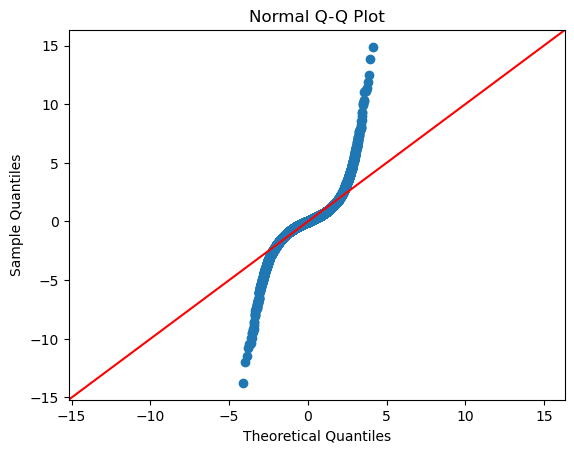

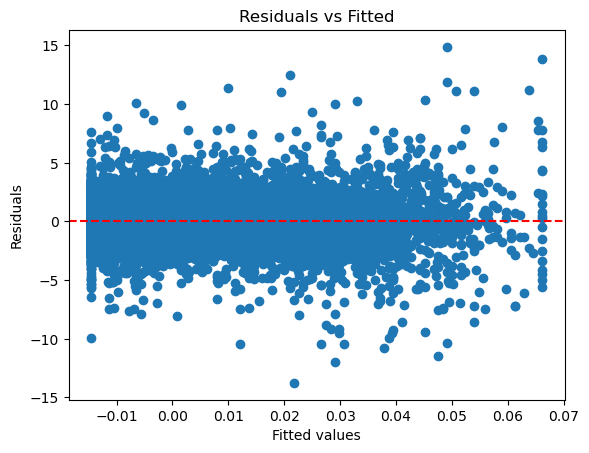

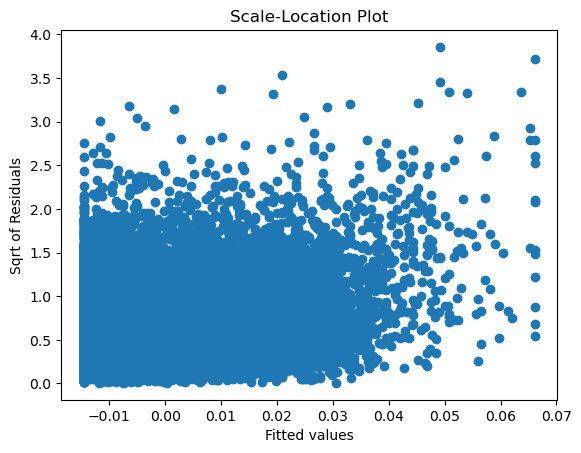

KeyboardInterrupt: 

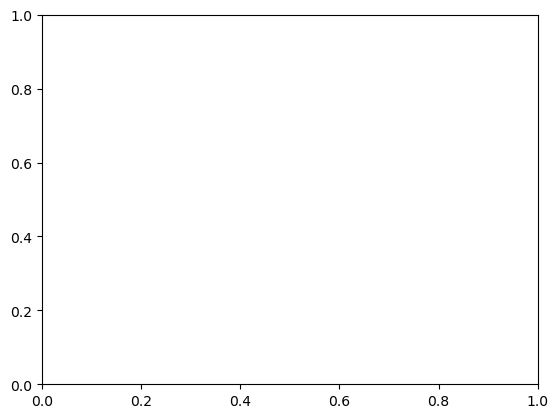

In [9]:
# QQ plot for normality of residuals
fig = sm.qqplot(results.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(results.fittedvalues, results.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
sm.graphics.influence_plot(results, criterion="cooks")
plt.title('Influence Plot')
plt.show()

Given these results we will use a robust regression which does not have these assumptions. 

In [17]:
X6 = df[['name_price_attention', 'mkt_cap', 'volume']]

X6 = sm.add_constant(X6)  
model = sm.OLS(y, X6)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     15.63
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           3.71e-10
Time:                        17:36:55   Log-Likelihood:                -99938.
No. Observations:               70448   AIC:                         1.999e+05
Df Residuals:                   70444   BIC:                         1.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.144e-18 

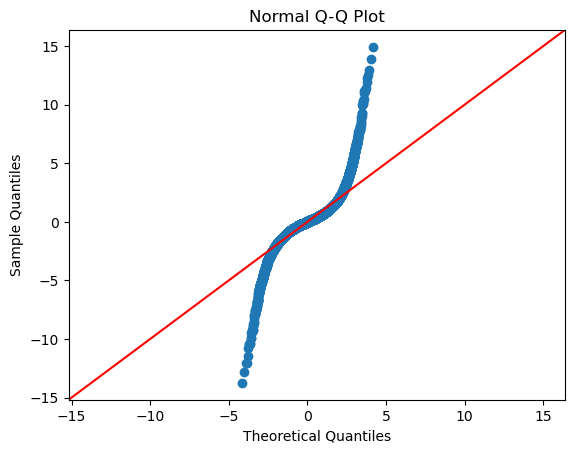

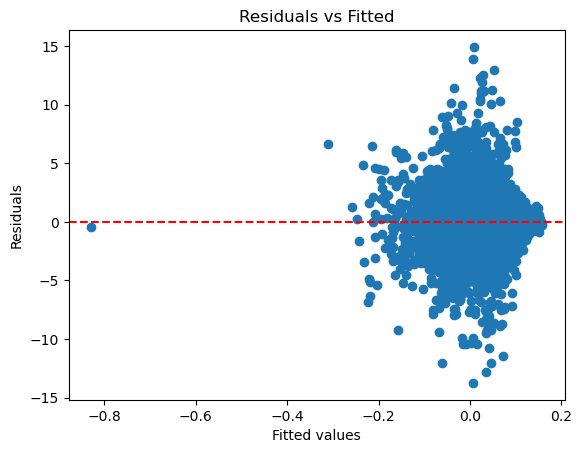

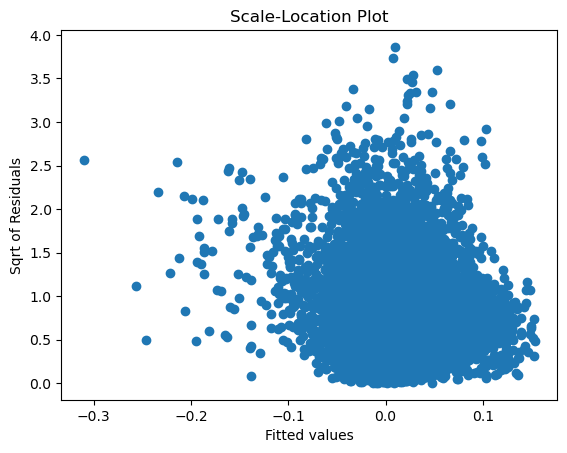

KeyboardInterrupt: 

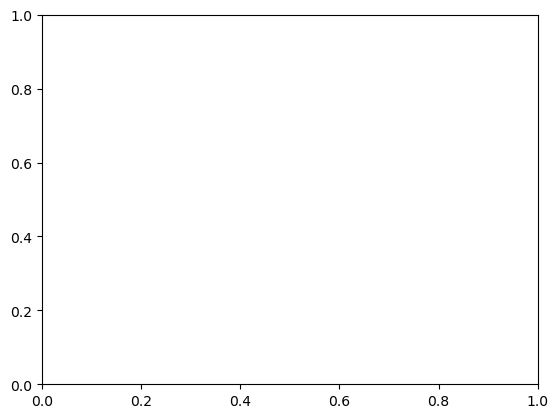

In [19]:
# QQ plot for normality of residuals
fig = sm.qqplot(results.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(results.fittedvalues, results.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
sm.graphics.influence_plot(results, criterion="cooks")
plt.title('Influence Plot')
plt.show()

In [15]:
# create numpy arrays for each feature combination to later call in the OLS and robust regression 
X1 = df[['name_price_attention']]
X2 = df[['name_price_attention', 'mkt_cap']]
#X3 = df[['name_price_attention', 'daily_volatility']]
X4 = df[['name_price_attention', 'volume']]
#X5 = df[['name_price_attention', 'mkt_cap', 'daily_volatility']]
X6 = df[['name_price_attention', 'mkt_cap', 'volume']]
#X7 = df[['name_price_attention', 'volume', 'daily_volatility']]
#X8 = df[['name_price_attention', 'mkt_cap', 'volume', 'daily_volatility']]
#X8 = df[['name_price_attention', 'mkt_cap', 'volume', ]]

In [14]:
# create a robust regression for each feature combination
X1 = sm.add_constant(X1)
model1 = sm.RLM(y, X1, M=sm.robust.norms.HuberT())
results1 = model1.fit()
print(results1.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 return   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70446
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 04 Mar 2024                                         
Time:                        17:26:24                                         
No. Iterations:                    21                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0039 

In [32]:
X2 = sm.add_constant(X2)
model2 = sm.RLM(y, X2, M=sm.robust.norms.HuberT())
results2 = model.fit()
print(results2.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 return   No. Observations:                64008
Model:                            RLM   Df Residuals:                    64003
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Mar 2024                                         
Time:                        15:51:26                                         
No. Iterations:                    50                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005 

In [33]:
X3 = sm.add_constant(X3)
model3 = sm.RLM(y, X3, M=sm.robust.norms.HuberT())
results3 = model.fit()
print(results3.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 return   No. Observations:                64008
Model:                            RLM   Df Residuals:                    64003
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Mar 2024                                         
Time:                        15:51:27                                         
No. Iterations:                    50                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005 

In [34]:
X4 = sm.add_constant(X4)
model4 = sm.RLM(y, X4, M=sm.robust.norms.HuberT())
results4 = model.fit()
print(results4.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 return   No. Observations:                64008
Model:                            RLM   Df Residuals:                    64003
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Mar 2024                                         
Time:                        15:51:27                                         
No. Iterations:                    50                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005 

In [35]:
X5 = sm.add_constant(X5)
model5 = sm.RLM(y, X5, M=sm.robust.norms.HuberT())
results5 = model.fit()
print(results5.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 return   No. Observations:                64008
Model:                            RLM   Df Residuals:                    64003
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Mar 2024                                         
Time:                        15:51:28                                         
No. Iterations:                    50                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005 

In [36]:
X6 = sm.add_constant(X6)
model6 = sm.RLM(y, X6, M=sm.robust.norms.HuberT())
results6 = model.fit()
print(results6.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 return   No. Observations:                64008
Model:                            RLM   Df Residuals:                    64003
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Mar 2024                                         
Time:                        15:51:28                                         
No. Iterations:                    50                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005 

In [37]:
X7 = sm.add_constant(X7)
model7 = sm.RLM(y, X7, M=sm.robust.norms.HuberT())
results7 = model.fit()
print(results7.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 return   No. Observations:                64008
Model:                            RLM   Df Residuals:                    64003
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Mar 2024                                         
Time:                        15:51:29                                         
No. Iterations:                    50                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005 

In [38]:
X8 = sm.add_constant(X8)
model8 = sm.RLM(y, X8, M=sm.robust.norms.HuberT())
results8 = model.fit()
print(results8.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 return   No. Observations:                64008
Model:                            RLM   Df Residuals:                    64003
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Mar 2024                                         
Time:                        15:51:29                                         
No. Iterations:                    50                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005 

In [29]:
# print a regression table showing all the results 
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[results,results,results,results,results,results,results,results],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6','Model 7','Model 8'],
                            info_dict=info_dict,
                            regressor_order=['const','name_price_attention', 'mkt_cap', 'daily_volatility', 'volume'])

results_table.add_title('Table 1 - OLS and Robust Regression Results')
print(results_table)

                        Table 1 - OLS and Robust Regression Results
                     Model 1  Model 2  Model 3  Model 4  Model 5  Model 6  Model 7  Model 8 
--------------------------------------------------------------------------------------------
const                0.00***  0.00***  0.00***  0.00***  0.00***  0.00***  0.00***  0.00*** 
                     (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)  
name_price_attention 0.00***  0.00***  0.00***  0.00***  0.00***  0.00***  0.00***  0.00*** 
                     (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)  
mkt_cap              0.00***  0.00***  0.00***  0.00***  0.00***  0.00***  0.00***  0.00*** 
                     (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)  
daily_volatility     0.00***  0.00***  0.00***  0.00***  0.00***  0.00***  0.00***  0.00*** 
                     (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)  
vo

In [40]:
# Create a summary table
from statsmodels.iolib.summary2 import summary_col

# You can customize the summary table further as needed
results_table = summary_col(models,
                             stars=True,
                             model_names=[
                                 'Model1', 'Model2', 'Model3',
                                 'Model4', 'Model5', 'Model6',
                                 'Model7', 'Model8'
                             ],
                             info_dict={
                                 'R2': lambda x: f"{x.rsquared:.2f}",
                                 'No. observations': lambda x: f"{int(x.nobs)}"
                             })

print(results_table)



NameError: name 'models' is not defined